# OKTAVIAN Cobalt benchmark analysis
Add description


In [1]:
import openmc_fusion_benchmarks as ofb
import matplotlib.pyplot as plt
import numpy as np

import helpers

### Extract experimental and codes results from results_database


In [2]:
# read conderc data
experiment_file = ofb.ResultsFromDatabase('experiment.h5', path='results_database')

In [3]:
# read openmc results in results_database/
openmc_endfb80_file = ofb.ResultsFromDatabase('openmc-0-14-0_endfb80.h5', path='results_database')
openmc_jeff33_file = ofb.ResultsFromDatabase('openmc-0-14-0_jeff33.h5', path='results_database')

In [4]:
# read mcnp results in results_database/
mcnp_endfb80_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_endfb80.h5', path='results_database')
mcnp_jeff33_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jeff33.h5', path='results_database')
mcnp_jendl40_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_jendl40.h5', path='results_database')
mcnp_tendl17_file = ofb.ResultsFromDatabase('mcnp-6-1-1b_tendl17.h5', path='results_database')

### Spectrometers - neutron energy spectra
Neutron energy spectra between 30 keV and 15 MeV measured by the time-of-flight technique using a 14 MeV  D-T neutron generator.

In [5]:
# experiment from results_database/
n21 = experiment_file.get_tally_dataframe('nspectrum')
g41 = experiment_file.get_tally_dataframe('gspectrum')

In [6]:
# openmc from results_database/
openmc_endfb80_n21 = openmc_endfb80_file.get_tally_dataframe('nspectrum')
openmc_endfb80_g41 = openmc_endfb80_file.get_tally_dataframe('gspectrum')

openmc_jeff33_n21 = openmc_jeff33_file.get_tally_dataframe('nspectrum')
openmc_jeff33_g41 = openmc_jeff33_file.get_tally_dataframe('gspectrum')

In [7]:
# mcnp from results_database/
mcnp_endfb80_n21 = mcnp_endfb80_file.get_tally_dataframe('nspectrum')
mcnp_endfb80_g41 = mcnp_endfb80_file.get_tally_dataframe('gspectrum')

mcnp_jeff33_n21 = mcnp_jeff33_file.get_tally_dataframe('nspectrum')
mcnp_jeff33_g41 = mcnp_jeff33_file.get_tally_dataframe('gspectrum')

mcnp_jendl40_n21 = mcnp_jendl40_file.get_tally_dataframe('nspectrum')
mcnp_jendl40_g41 = mcnp_jendl40_file.get_tally_dataframe('gspectrum')

mcnp_tendl17_n21 = mcnp_tendl17_file.get_tally_dataframe('nspectrum')
mcnp_tendl17_g41 = mcnp_tendl17_file.get_tally_dataframe('gspectrum')

In [8]:
ylabel_n = r'Neutron flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'nspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

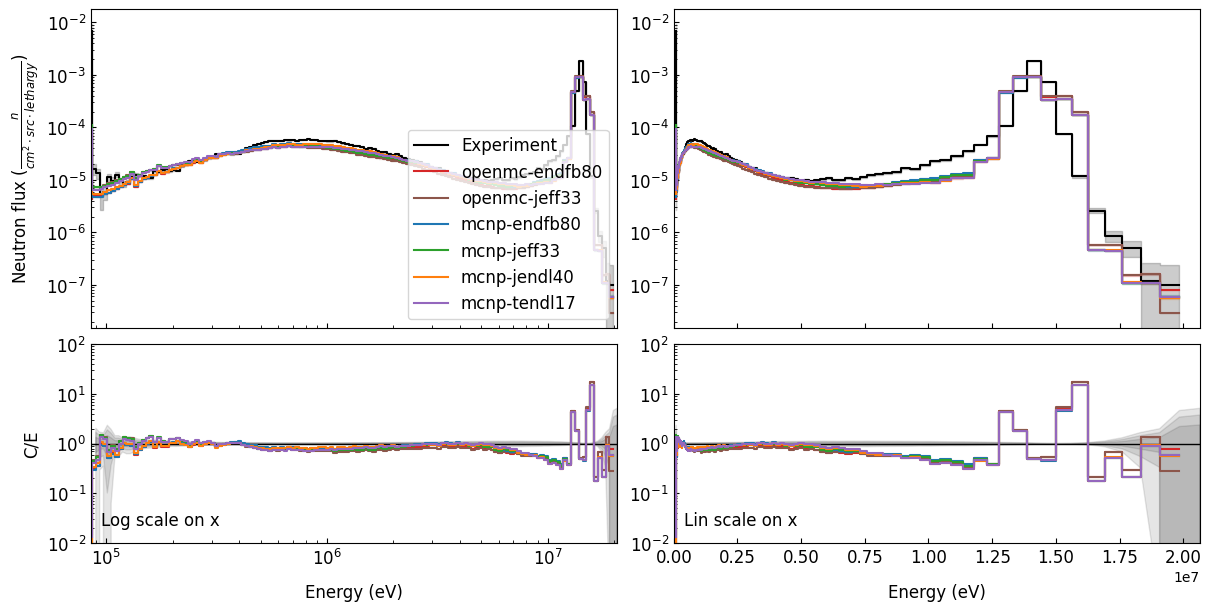

In [9]:
# preprocessing
n21 = ofb.rescale_to_lethargy(n21)
openmc_endfb80_n21 = ofb.rescale_to_lethargy(openmc_endfb80_n21)
openmc_jeff33_n21 = ofb.rescale_to_lethargy(openmc_jeff33_n21)
mcnp_endfb80_n21 = ofb.rescale_to_lethargy(mcnp_endfb80_n21)
mcnp_jeff33_n21 = ofb.rescale_to_lethargy(mcnp_jeff33_n21)
mcnp_jendl40_n21 = ofb.rescale_to_lethargy(mcnp_jendl40_n21)
mcnp_tendl17_n21 = ofb.rescale_to_lethargy(mcnp_tendl17_n21)

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_n)
plot.add_reference_results(reference_data=n21, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_n21, color='tab:red', alpha=1, label='openmc-endfb80')
plot.add_computed_results(computed_data=openmc_jeff33_n21, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=mcnp_endfb80_n21, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_n21, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_n21, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_n21, color='tab:purple', alpha=1, label='mcnp-tendl17')

### Spectrometers - gamma energy spectra

In [10]:
ylabel_g = r'Gamma flux $(\frac{n}{cm^2 \cdot src \cdot lethargy})$'
tally_name = 'gspectrum'
xaxis = experiment_file.get_tally_xaxis(tally_name)

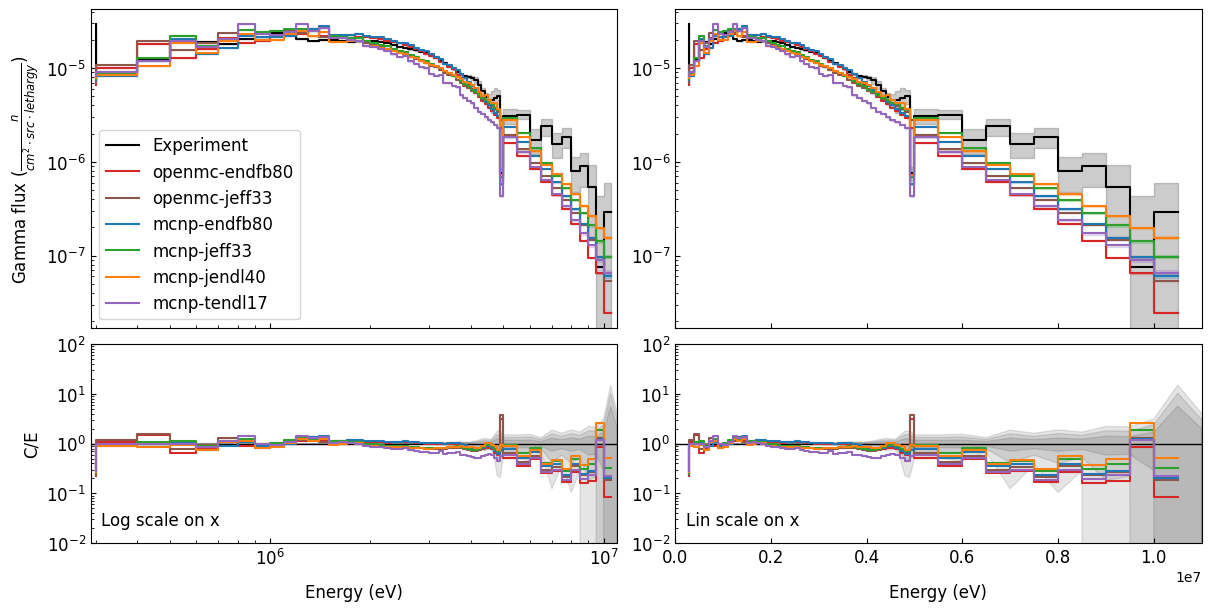

In [11]:
# preprocessing
g41 = ofb.rescale_to_lethargy(g41)
openmc_endfb80_g41 = ofb.rescale_to_lethargy(openmc_endfb80_g41)
openmc_jeff33_g41 = ofb.rescale_to_lethargy(openmc_jeff33_g41)
mcnp_endfb80_g41 = ofb.rescale_to_lethargy(mcnp_endfb80_g41)
mcnp_jeff33_g41 = ofb.rescale_to_lethargy(mcnp_jeff33_g41)
mcnp_jendl40_g41 = ofb.rescale_to_lethargy(mcnp_jendl40_g41)
mcnp_tendl17_g41 = ofb.rescale_to_lethargy(mcnp_tendl17_g41)

# generate figure
plot = ofb.PlotEnergySpectra(xaxis=xaxis, ylabel=ylabel_g)
plot.add_reference_results(reference_data=g41, label='Experiment')
plot.add_computed_results(computed_data=openmc_endfb80_g41, color='tab:red', alpha=1, label='openmc-endfb80')
plot.add_computed_results(computed_data=openmc_jeff33_g41, color='tab:brown', alpha=1, label='openmc-jeff33')
plot.add_computed_results(computed_data=mcnp_endfb80_g41, color='tab:blue', alpha=1, label='mcnp-endfb80')
plot.add_computed_results(computed_data=mcnp_jeff33_g41, color='tab:green', alpha=1, label='mcnp-jeff33')
plot.add_computed_results(computed_data=mcnp_jendl40_g41, color='tab:orange', alpha=1, label='mcnp-jendl40')
plot.add_computed_results(computed_data=mcnp_tendl17_g41, color='tab:purple', alpha=1, label='mcnp-tendl17')

### References
[1] Ichihara, C., et al. "Proc. Int. Conf. on Nucl. Data for Sci. and Technol.", Mito, Japan, pp.319-322 (1988). \
[2] Ichihara, C., et al. "Proc. Second Specialists' Meeting on Nucl. Data for Fusion Reactors (1991)", JAERI-M 91-062 (1991). \
[3] Yamamoto, J. et al. "Gamma-Ray Emission Spectra from Spheres with 14 MeV Neutron Source", JAERI-M 89-026, 232 (1989). \
[4] Yamamoto J. et al. "Integral Experiment on Gamma-Ray Production at OKTAVIAN", JAERI-M 91-062, 118 (1991). \
[5] Maekawa, F., et al. "Data collection of fusion neutronics benchmark experiment conducted at FNS/JAERI". No. JAERI-DATA/CODE--98-021. Japan Atomic Energy Research Inst., 1998. \
[6] Sumita K., et al. "Proc. 12th SOFT", Vol. 1 (1982) \
[7] Kodeli, I. A., et al. "SINBAD–Radiation shielding benchmark experiments." Annals of Nuclear Energy 159 (2021): 108254. https://doi.org/10.1016/j.anucene.2021.108254 